## Get similarity between nodes

### Extract semantic features for each node

In [1]:
from graph_utils import networkx, extract_features_from_nx_graph

g_nx_ltown = networkx(r"D:\Master\Thesis\Code\L-Town\knowledge_graph-LTown.ttl")

In [2]:
node_features = extract_features_from_nx_graph(
    g_nx_ltown,
   "https://raw.githubusercontent.com/DiTEC-project/wdn-knowledge-graph/refs/heads/main/wdn_ontology.ttl",
    node_type_filter="Junction",  # Or full URI if you want
    attribute_keys=["baseDemand", "elevation"],
    edge_predicates=None
)

In [3]:
node_features

{'Junction_n771': {'baseDemand': 0.0, 'elevation': 21.9296},
 'Junction_n306': {'baseDemand': 6.253889e-05, 'elevation': 23.6839},
 'Junction_n85': {'baseDemand': 3e-07, 'elevation': 38.6811},
 'Junction_n62': {'baseDemand': 2.196111e-05, 'elevation': 35.96},
 'Junction_n537': {'baseDemand': 2.6275e-05, 'elevation': 22.2569},
 'Junction_n401': {'baseDemand': 8.686944e-05, 'elevation': 40.4005},
 'Junction_n756': {'baseDemand': 7.4e-06, 'elevation': 23.6439},
 'Junction_n453': {'baseDemand': 7.213056e-05, 'elevation': 30.7973},
 'Junction_n84': {'baseDemand': 3.943056e-05, 'elevation': 28.8092},
 'Junction_n263': {'baseDemand': 2.889444e-05, 'elevation': 24.6696},
 'Junction_n319': {'baseDemand': 1.461944e-05, 'elevation': 30.4617},
 'Junction_n470': {'baseDemand': 4.74e-05, 'elevation': 26.4802},
 'Junction_n407': {'baseDemand': 4.538056e-05, 'elevation': 31.6562},
 'Junction_n612': {'baseDemand': 7e-07, 'elevation': 17.7569},
 'Junction_n591': {'baseDemand': 6.080556e-06, 'elevation':

In [4]:
import pandas as pd
demands = pd.read_csv(r"D:\Master\Thesis\Code\L-Town\2018_SCADA_Demands.csv", sep = ";", decimal = ",") # Junctions demand Liters per hour (L/h) (nodeID)

In [5]:
demands

,Timestamp,n1,n2,n3,n4,n6,n7,n8,n9,n10,...,n379,n381,n382,n383,n384,n385,n386,n387,n388,n389
0,2018-01-01 00:00:00,40.83,112.23,96.71,131.29,166.18,81.92,249.95,489.63,58.83,...,33.41,150.82,67.61,65.82,65.25,57.39,214.20,81.49,256.50,92.14
1,2018-01-01 00:05:00,40.20,166.05,239.53,136.21,154.48,372.14,190.56,171.60,38.02,...,78.90,97.46,95.29,50.18,81.29,49.67,109.14,104.46,394.48,203.61
2,2018-01-01 00:10:00,38.06,121.91,69.12,131.00,160.10,320.79,242.07,39.35,52.79,...,100.26,135.33,178.10,63.74,252.94,9.69,285.82,94.32,337.33,93.11
3,2018-01-01 00:15:00,37.24,33.15,139.01,155.02,244.34,335.55,128.87,252.95,34.28,...,80.80,87.88,51.60,33.93,139.25,36.15,183.66,57.27,268.74,96.19
4,2018-01-01 00:20:00,45.38,122.55,72.13,148.66,257.18,382.41,259.25,318.29,69.56,...,59.57,178.33,79.05,68.27,43.76,22.05,226.42,140.88,423.29,96.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2018-12-31 23:35:00,117.46,167.89,124.12,1929.92,336.88,270.16,227.42,428.63,22.70,...,28.59,58.20,80.81,59.89,96.57,50.18,409.87,198.09,337.25,125.61
105116,2018-12-31 23:40:00,119.47,81.07,312.41,2042.10,261.50,332.87,295.73,543.91,64.40,...,52.32,165.10,137.53,77.87,225.10,40.81,285.58,163.48,380.56,214.91
105117,2018-12-31 23:45:00,203.61,208.57,132.87,2044.56,305.70,282.20,190.18,219.76,0.00,...,81.65,0.00,153.77,50.08,96.36,36.95,179.42,128.94,289.02,161.32
105118,2018-12-31 23:50:00,204.87,121.11,178.45,1993.61,117.58,442.95,136.33,393.23,41.82,...,100.77,107.21,157.36,35.90,0.00,55.11,259.01,150.83,389.79,159.76


In [6]:
# Select only nodes that are available in the sensor data
node_features_filtered = {
    node.split('_')[-1]: info for node, info in node_features.items() if node.split('_')[-1] in demands.columns
}
node_features_filtered

{'n19': {'baseDemand': 3.59e-05, 'elevation': 73.3626},
 'n43': {'baseDemand': 3.28e-05, 'elevation': 61.8585},
 'n346': {'baseDemand': 4.96e-05, 'elevation': 67.93},
 'n1': {'baseDemand': 0.0, 'elevation': 73.2105},
 'n353': {'baseDemand': 8.13e-05, 'elevation': 73.5455},
 'n8': {'baseDemand': 8.37e-05, 'elevation': 64.4833},
 'n31': {'baseDemand': 3.23e-05, 'elevation': 65.0059},
 'n20': {'baseDemand': 4.01e-05, 'elevation': 65.9549},
 'n389': {'baseDemand': 4.67e-05, 'elevation': 67.0238},
 'n374': {'baseDemand': 3.13e-05, 'elevation': 74.9737},
 'n351': {'baseDemand': 0.000109, 'elevation': 75.4663},
 'n384': {'baseDemand': 5.84e-05, 'elevation': 69.5445},
 'n18': {'baseDemand': 2.01e-05, 'elevation': 67.142},
 'n381': {'baseDemand': 6.39e-05, 'elevation': 74.0464},
 'n16': {'baseDemand': 2.68e-05, 'elevation': 68.7986},
 'n2': {'baseDemand': 4.72e-05, 'elevation': 73.8737},
 'n35': {'baseDemand': 0.0, 'elevation': 59.6258},
 'n373': {'baseDemand': 8.5e-06, 'elevation': 59.6553},
 

### Normalize and standardize features

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import LabelBinarizer
from itertools import combinations
import numpy as np

# Collect features
node_ids = list(node_features_filtered.keys())

# Prepare numeric features
baseDemands, elevations = [], []

for nid in node_ids:
    f = node_features_filtered[nid]

    baseDemands.append(f["baseDemand"])
    elevations.append(f["elevation"])

# Scale numeric and binary features
scaler = StandardScaler()
numeric_features = scaler.fit_transform(np.array([baseDemands, elevations]).T)



In [8]:
numeric_features

array([[-0.16529742,  1.06094803],
       [-0.25231347, -1.14975376],
       [ 0.21925742,  0.0169847 ],
       [-1.1729995 ,  1.03171952],
       [ 1.10906678,  1.09609527],
       [ 1.17643406, -0.64535532],
       [-0.26634832, -0.54492915],
       [-0.04740469, -0.36256321],
       [ 0.1378553 , -0.15715652],
       [-0.29441802,  1.37054736],
       [ 1.88659737,  1.46520854],
       [ 0.46627075,  0.3272374 ],
       [-0.60879861, -0.13444244],
       [ 0.62065407,  1.19235143],
       [-0.42073165,  0.18390046],
       [ 0.15189015,  1.15916429],
       [-1.1729995 , -1.57880374],
       [-0.93440709, -1.57313483],
       [-0.79125164,  0.71126278],
       [ 1.98203433,  0.27306568],
       [-0.76318194,  0.65113391],
       [-0.71546346,  1.15078584],
       [ 0.4522359 ,  1.37852227],
       [-0.86984679, -0.33127852],
       [ 3.11605005,  1.56471232],
       [-0.27196226,  0.62415374],
       [-0.41511771,  0.43281363],
       [-0.20459499, -0.09612446],
       [-0.83054921,

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numeric_features)
    inertias.append(kmeans.inertia_)


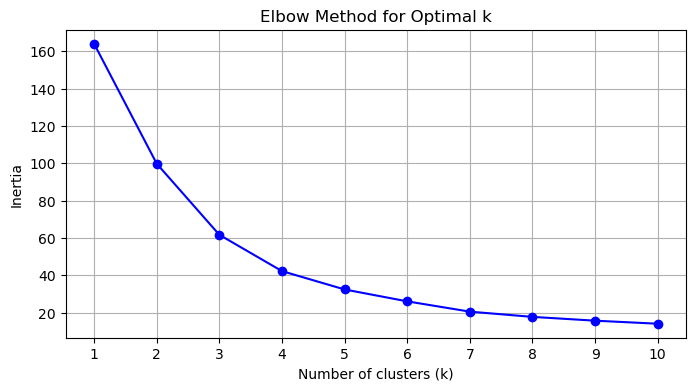

In [10]:
# Plotting the elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [11]:
# Cluster
from collections import defaultdict


kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(numeric_features)

pipe_clusters = dict(zip(node_ids, kmeans.labels_))
# 
clusters = defaultdict(list)
# Example: print each pipe with its assigned cluster
for pipe, cluster in pipe_clusters.items():
    clusters[cluster].append(pipe)

for cluster_id, pipes in clusters.items():
    print(f"Cluster {cluster_id}: {', '.join(sorted(pipes))}")


Cluster 1: n1, n10, n16, n19, n2, n22, n29, n3, n32, n345, n346, n347, n349, n350, n352, n354, n357, n362, n368, n371, n374, n375, n376, n378, n379, n382, n383, n384, n41
Cluster 0: n18, n20, n21, n23, n24, n25, n26, n27, n28, n31, n33, n34, n343, n35, n356, n361, n364, n365, n366, n367, n369, n370, n372, n373, n377, n385, n387, n389, n39, n4, n43, n44
Cluster 3: n30, n344, n351, n353, n358, n36, n381, n6, n7, n9
Cluster 2: n11, n13, n17, n355, n360, n386, n388, n40, n42, n45, n8
